<a href="https://colab.research.google.com/github/supportchelsea/Simple-code/blob/master/saramin_crawling%2Bword_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 4 not upgraded.
Need to get 70.1 MB of archives.
After this operation, 257 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 75.0.3770.90-0ubuntu0.18.04.1 [1,112 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 75.0.3770

In [15]:
!pip install konlpy
!pip install customized_konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 2.7MB 29.6MB/s 
     |████████████████████████████████| 890kB 2.8MB/s 


In [16]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 131091 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import datetime as dt
import urllib.parse
import re
from tqdm import tqdm_notebook
import sys
import pandas as pd
import numpy as np
from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Okt
from ckonlpy.tag import Twitter

In [87]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


# Crawling

In [0]:

options = webdriver.ChromeOptions()
options.add_argument ('--headless')
options.add_argument ('--no-sandbox')
options.add_argument ('--disable-dev-shm-usage')

browser = webdriver.Chrome ( 'chromedriver' , options = options)

In [0]:
# 검색을 위한 변수 설정 
startdate=dt.date(year=2019,month=1,day=1)
untildate=dt.date(year=2019,month=1,day=2)
enddate = dt.date(year=2019,month=7,day=20)
keyword = urllib.parse.quote_plus("사람인")

In [0]:
# 트윗 클렌징을 위한 함수
def cleantweet(total_tweets_dict):
    keys = list(total_tweets_dict.keys())
    cleaned_tweet_dict = {}
  
    for key in keys:
        cleaned_tweet = []
        cleaned_tweet_dict[key] = []
        tweets_value = total_tweets_dict[key]
    
        for tweet in tweets_value:
            tmp = re.sub('<.+?>', '', str(tweet), 0).strip()
            tmp = re.sub('pic.+','',str(tmp),0).strip()
            tmp = re.sub('http?://\S+','',str(tmp),0).strip()
            tmp = re.sub(' https?://\S+','',str(tmp),0).strip()
            tmp = re.sub('\n','',str(tmp),0).strip()
            cleaned_tweet.append(tmp)

        cleaned_tweet_dict[key] += cleaned_tweet
    
    return cleaned_tweet_dict

In [13]:
daily_tweet = {}

for i in tqdm_notebook(np.arange(startdate,enddate)):

  daily_tweet[str(startdate)] = []

  url='https://twitter.com/search?l=ko&q='+keyword+'%20since%3A'+str(startdate)+'%20until%3A'+str(untildate)+'&src=typd'

  browser.get (url)

  html = browser.page_source
  soup=BeautifulSoup(html,'html.parser')

  lastHeight = browser.execute_script("return document.body.scrollHeight")

  while True:
    tweets=soup.find_all("p", {"class": "TweetTextSize"})

    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)

    newHeight = browser.execute_script("return document.body.scrollHeight")

    if newHeight > lastHeight:
      daily_tweet[str(startdate)] += tweets
    else:
      daily_tweet[str(startdate)] += tweets
      startdate=untildate
      untildate+=dt.timedelta(days=1)
      break

    lastHeight = newHeight

  if startdate.month != untildate.month:
    print(startdate.month)

1
2
3
4
5
6



In [0]:
cleaned_tweet_dict = cleantweet(daily_tweet)

In [0]:
saramin = pd.DataFrame.from_dict(cleaned_tweet_dict,orient='index')
saramin = saramin.transpose()

In [32]:
saramin.head(3)

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,...,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,2019-06-18,2019-06-19,2019-06-20,2019-06-21,2019-06-22,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-02,2019-07-03,2019-07-04,2019-07-05,2019-07-06,2019-07-07,2019-07-08,2019-07-09,2019-07-10,2019-07-11,2019-07-12,2019-07-13,2019-07-14,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19
0,"1월 1일 지나가기전에 올리자,, 새해맞이 브리키 ,, 디키가 항상 모두에게 다정...",190102 류제홍폰케이스다못들고간다고ㅋㅋㅋㅋ장사하러온사람인줄알면 어카냐곸ㅋㅋㅋㅋ앀...,싫은건 싫은거좋은건 좋은거그래서 난 단순한가아니 단지 조금더 의사표현이 정확한 사람...,와 페미니즘! 공부보다 쉽다!코르셋 안입기 섹스 안하기 연애 안하기 결혼 안하기이것...,배켡 진짜 좋은게 팬들한테는 정말 세상 사랑스럽고 다정하게 표현많이 해주는데 사생들...,근데 탠 욱긴다 오사카 룸메 영상 보면 남이 자기 침대에 눕는 거 시러해가지구 침대...,기운이 없다... 우울하다 죽고싶다ㅡ 나는 무기력하고 무능한 사람인 거 같다 나중에...,밤늦게까지 학교에 있다와서 앉은 자리 그대로 꼼짝 않고 밤새버렸다.. *O*... ...,앞으로 코믹월드 까면서 타행사 쉴드치면 되게 웃기는 사람인 것으로...,ㅋㅋㅋㅋㅋ아나 바스테트 소설 넘 웃김ㅋㅋㅋ몇년동안 죽은척하다 오랜만에 딸한테 연락해...,그러니까 아빠 제발 부탁인데 날 좀 존중해줘. 명문대 나온 사람만 사람인냥 착각하는...,같은 사람인 줄 모르게 만든 염정아 연기력.jpgif,#제5인격_봇친소 ㅇㅣ걷어떡ㅔ하느지아ㅡㄴ놈?사피랑ㄴ이냐석형님한태ㅅㅣ켜놓고하늦법도안서...,Tip. 이런 거 올려 놓으면 맞춤법 잘하는 사람인 척할 수 있다.,퇴장하고 재입장해서 닉네임 바꿔도 기존 대화 닉네임까지 다 바뀌는 거 몰라서 다른 ...,중립충이 젤 좆같은 이유 : 자기는 이쪽 의견도 저쪽 의견도 수용할 줄 아는 포용력...,남자들이 말하는 ‘그런 미친놈들을 조심해라’... 그런 말 하려면 ‘그런 놈들’인지...,광희는 연기를 못하는 게 아니라 그냥 그런 사람인 것이다... 광히는 자기가 진짜로...,툭하면 배우한테 이새끼저새끼로 지칭하던데 그게 정말 애칭이 될수 있는거야? 원래 입...,190120 #프롬요섭오늘 너 없이는 완성되지 않았을그 순간이 바로 오늘인 걸네가 ...,유튜브 활동하면서 익명 뒤에 숨어 저를 공격하시는 분들을 많이 봐왔습니다. 댓글로 ...,박시장 대권욕심부리는거너무 티나는데대통령되서 뭘 할사람인지를전혀모르겠어뭘 할수있는지...,방금전에 universe puppy kingdom에서 전화가 왔어 종현이가 가짜인간...,190124 𝐚𝐛𝐨𝐮𝐭 𝐣𝐢𝐡𝐨𝐨𝐧.- 제가 워ㄴ원 하면서 멘탈 관리하는데 제일 큰...,극단적으로 말해서 유연이 죽으면 바로 제 관자놀이에 총구 겨눌 것 같은 사람인;(;,나는 네가 고개 숙일 때마다 가슴이 미어지는 것 같아 너의 간절함을 모르는 사람들에...,방금전에 fairy police station에서 전화가 왔어 요정이 그동안 사람인...,이미 요정인 거 들켜놓고 사람인 척,뭐야뭐야 누가 보면 전원우 키 안 큰 사람인 줄...옆 사람이(=186+α) 너무 ...,sbs 손석희 녹취 터졌네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ나는 손석희가 완전 깨끗하고 ...,"[ #단독 ] ""피해 여성이 아는 사람인 줄 착각해 만졌다"" 에쓰오일 대표, 호텔서...",방금전에 Rabbit Kingdom에서 전화가 왔어 도영 아니 Rabbit이 그동안...,#천악중학교#천만덕캐들_사랑해#1.5기에서_만나자#당근빌런은_당근_그만_찾아ㅠㅠ.....,반고흐 21세기 사람인줄,저 무서운 사람인 건 맞는데 너무 무서워마세요. 제가 좆같애 봐야 얼마나 좆같겠어요?!,지금아육대로 정재현첨본사람들그가 누군가를웃기기위해서 태연히 콧구멍에 브이박는사람인건...,풍경 듣는데 자꾸 정국이 표정이 생각나서 웃음이 나요 누가보면 미친 사람인줄 알겠네,이것만 보면 달리기 트랙 날아다니는 사람인줄 모를 듯ㄱㅇㅇ,방금 police station에서 전화가 왔어 찬희 홍조가 너무 귀여워서 Kore...,통합후에지겹게도주야장천개혁보수만외친자는죽음의계곡을입으로만수시로드나드는사람인건맞긴하지...,...,가끔 내 상식선에서 당연하게 이루어지는 예절들이 이상하게 안지켜지거나 아예 자각조차...,일리싯 선수 첨엔 되게 무서운 사람인 줄 알었는데... 고독방 보다 보니까 완전 친...,포켓몬세대라니! 포켓몬은 요즘도 계속 나와요~! 내가 단지 그 1세대 전설을 목격한...,백종원이 남자치곤 좋은면이 많은 사람인 거 맞는데 또 신혼여행가서까지 자기 가고 싶...,"김제동이 사드지역에 가서 연설한거 내가 칭찬하니까, 울 남편이 코웃음치며 비웃던게 ...",3B7a. 사람이 사람인 까닭은 예의가 있기 때문이다. 예의의 시초는 몸가짐을 바르...,찬백 명탐정 OO 호텔베네치아이런 사람인건 알고 보셨으면 ^^ㅗ 무슨 낯짝으로 뻔뻔...,190617ㅠㅜㅠㅜㅠㅜㅜㅜㅜㅜ 사람인까? 신님이신까?#SF9 #에스에프나인 #RPM...,실트 자기모에화 만화... 자기모에화는 그렇다 쳐도 상대방이 나쁜것처럼 표현한게 문...,"가끔은 꿀빵이가 만화캐릭터처럼 몸만 고양이고 정신은 사람인 것을 상상하는데, 분명 ...",내가 본 주접 중에 최고 웃겼다 ㅋㅋㅋㅋㅋㅋ 45억년 먹은 세계에서 미나 마수드랑 ...,야 나 탐라 지뢰 들었거든? 근데 결론은 걍 다 다름. 솔직히 다들 인기멤 하나쯤은...,세상에 이게 뭐야. 전설의 광안중 댄동회장 이은상 후기. 선후배친구들 아니고 옆반쌤...,난 처음 자해 접하게 된 이유가 이렇게 힘든데 자해를 안 하니까 난 안 힘든 사람인...,"그리고 퇴사 이후에도 사람인/잡코리아나 거래처 볼 때 기준이 회사 자본금, 연매출이...",한국 사람인자위녀가어떤 생각으로자위대 창립기념일에참석을 했슬까?이웃이 우리집에무단 ...,단어를 저 정도로 줄여버리면 그걸 해석하는 사람의 취향을 볼 수 있어서 재밌어요Q....,"김정은 위원장과 대화하는 것처럼, 필요하면 사우디 왕세자와도 대화 해야지요. 그러나...",잔나비 정말 어이없네요 아기햄스터가 사람인 척하고 기타 치고 코러스 넣는 거 팬들이...,진단을 위해 내려온 의사에게 둘다 경고를 듣고나서야 진정했다. 보호자가 누구시냐 묻...,같이 일한 사람들이 매번 얘기해준다. 햄 실장님이 인성 최고 잘다녀오래. 도경수 예...,나도 사람인지라 여기에 들이는 시간과 노력이 과한 것이 아닐까 가끔 고민하곤 해.하...,안녕하셔요... 구 군밤 현 삼도(@ _____hypnos) 라고 하는 사람인대요...,190703 미로 채팅창에 뻔뻔하게 나타난 핵쟁이미로: 그런 걸로 제발 자기가 대단...,지진희 이렇게 부끄러움 많이 타는 사람인 거 오늘 처

In [0]:
tweet = [x  for v in cleaned_tweet_dict.values()for x in v]
unique_tweet = list(set(tweet))

In [46]:
len(unique_tweet)

3329

In [0]:
real_tweet =[]
for i in unique_tweet:
  if '취업' in i or '취준' in i:
    real_tweet.append(i)

In [60]:
real_tweet

['[페북 친구 인용] 태러방지법 때도 그랬다. 테러방지법 반대하는 이들에게 “그럼 테러 어떻게 막을래?”라고. 마치 테러방지법 반대하는 사람들이 테러를 걱정하지 않는 사람인 것처럼. 이번에도 비슷한 것 같다. https 차단에 반대하는 이들에게 “그럼 불법 음란사이트 어떻게 막을래?”라고 한다.',
 '비슷한 기조는 그의 대표작인 &lt;방가? 방가!&gt;에서도 반복됩니다. 취업난을 겪는 청년 태식(김인권)이 ‘동남아삘’ 외모를 무기로 부탄사람인 척 외국인노동자로 취직한다는 설정은 사실 위험하죠. 덕분에 한국사회가 외국인 노동자를 어떻게 대하는지 깨닫는다는 교훈적인 결말을 생각해도 말이죠.',
 '사람인 싸이트를 보고 느낀점:취업을제대로하려면이렇게 토익점수가 썩창이어선 않된다.그리고 대학생 병신서포터즈 5기 같은대외활동을 2번정도는 해줘야된다',
 "기업들이 신입사원을 채용할 것이라고 응답한 비율이 60%를 밑돈 건 지난 2015년 조사 이후 5년 만에 처음이라네요. (취업포탈 '사람인') \xa0…",
 '근데 선생님들나 진짜 내 생각보다 괜찮은 사람인 거 같아 이정도면 적당히 예쁘게 생겼고운동이야 열심히 하면 되고돈은... 돈... 그 일.. 취업 그...학교.. 그..... 그,,,..,,.,',
 '메인 영상으로 6가정분양사이트9에서 품종묘 고르고 길에서 받아오는 거 1년을 걸어놨죠. 그거 보고 그 사이트에서 고양이 사온 사람 한두 사람인 줄 아세요? 우리나라가 펫샵/가정분양 구분이 되는 줄 아시나요? 기부는 자주하신다니 앞으로도 더 하시고 그 전에 자신의 영향력도 더 생각해봤음하네요',
 "특정 직종에 취업하고 싶을 때 무엇을 준비해야 할지 모르겠다면...-&gt; 구인구직 사이트(사람인이라거나) 들어가서 그 직종 신입 사원 모집에 어떠한 능력이 '우대사항'으로 적혀있는지 보시면 됩니다."]

# Tokenize NLP

In [75]:
twitter = Twitter()
add_list = ['사람인','취업','취준','사이트']
twitter.add_dictionary(add_list,'Noun')  

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [0]:
def tokenize(list_name):

  list_corpus = []

  for unit in list_name:
      temp_corpus = twitter.pos(unit)
      temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]
      list_corpus.append(temp_corpus)

  return list_corpus

In [0]:
corpus = tokenize(real_tweet)
corpus = [x for i in corpus for x in i]

corpus.remove('이정')
corpus.remove('도면')
corpus.remove('거나')
corpus.remove('어가')
corpus.remove('보시')
corpus.remove('썩창')
corpus.remove('병신')
corpus.remove('려면')
corpus.remove('해도')
corpus.remove('방가')

c = " ".join(corpus)

In [92]:
c

'기조 대표 방가 서도 반복 취업 청년 태식 김인권 동남아 외모 무기 부탄 사람인 외국인 노동자 취직 설정 사실 위험 덕분 한국사 외국인 노동자 대하 교훈 결말 생각 사람인 싸이트 보고 취업 제대로 토익 점수 이어선 대학생 서포터즈 대외 활동 정도 기업 신입사원 채용 응답 비율 밑돈 지난 조사 이후 처음 취업 포탈 사람인 선생님 진짜 생각 사람인 적당 고운동 열심 취업 학교 특정 직종 취업 무엇 준비 구인 구직 사이트 사람인 직종 신입 사원 모집 능력 우대 사항'

In [0]:
from wordcloud import WordCloud

In [0]:
wordcloud = WordCloud(max_font_size=100).generate(c)

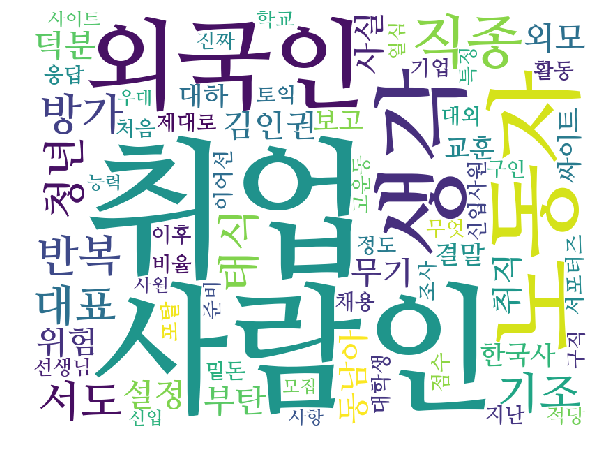

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate(c)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)